In [121]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import multivariate_normal as mvn
import random

<b>Read in the dataset

In [96]:
train = []
with open('mnist_train.csv', 'r') as f:
    reader = csv.reader(f)
    train.append(list(reader))
train =  train[0]

test = []
with open('mnist_test.csv', 'r') as f:
    reader = csv.reader(f)
    test.append(list(reader))
test =  test[0]

In [97]:
y_train = [int(t[0]) for t in train]
train = [t[1:] for t in train]
y_test = [int(t[0]) for t in test]
test = [t[1:] for t in test]

In [98]:
for index, t in enumerate(train):
    for ind ,a in enumerate(t):
         train[index][ind] = int(a)

In [99]:
for index, t in enumerate(test):
    for ind ,a in enumerate(t):
         test[index][ind] = int(a)

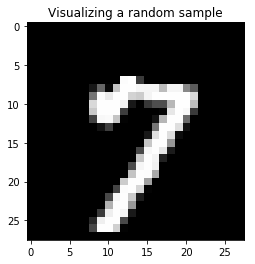

In [122]:
#see some of the data points.
plt.imshow(np.reshape(train[random.randint(1,1000)], [28,28]), cmap='Greys_r') 
plt.title('Visualizing a random sample')
plt.show()

<b>create a bayes model to train on the data

In [100]:
#find the likelhood of each class appearing
class_data = defaultdict(list)
class_counts = defaultdict(int)
class_labels = defaultdict(list)

for i in range(len(y_train)):
    y = y_train[i]
    x = train[i]
    if y == 0:
        class_counts[0] += 1
        class_data[0].append(x)
        class_labels[0].append(y)
    elif y == 1:
        class_counts[1] += 1
        class_data[1].append(x)
        class_labels[1].append(y)
    elif y == 2:
        class_counts[2] += 1
        class_data[2].append(x)
        class_labels[2].append(y)
    elif y == 3:
        class_counts[3] += 1
        class_data[3].append(x)
        class_labels[3].append(y)
    elif y == 4:
        class_counts[4] += 1
        class_data[4].append(x)
        class_labels[4].append(y)
    elif y == 5:
        class_counts[5] += 1
        class_data[5].append(x)
        class_labels[5].append(y)
    elif y == 6:
        class_counts[6] += 1
        class_data[6].append(x)
        class_labels[6].append(y)
    elif y == 7:
        class_counts[7] += 1
        class_data[7].append(x)
        class_labels[7].append(y)
    elif y == 8:
        class_counts[8] += 1
        class_data[8].append(x)
        class_labels[8].append(y)
    elif y == 9:
        class_counts[9] += 1
        class_data[9].append(x)
        class_labels[9].append(y)

In [101]:
total = 0
class_probs = {}
for val in class_counts.values():
    total += val
for key, val in class_counts.items():
    class_probs[key] = val / total

<BarContainer object of 10 artists>

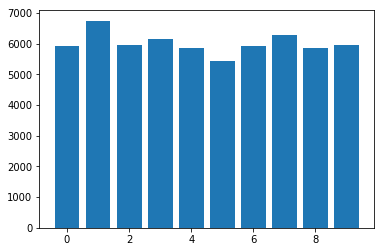

In [102]:
#see how the data is distributed
plt.bar(class_counts.keys(), class_counts.values())

In [103]:
class_counts

defaultdict(int,
            {5: 5421,
             0: 5923,
             4: 5842,
             1: 6742,
             9: 5949,
             2: 5958,
             3: 6131,
             6: 5918,
             7: 6265,
             8: 5851})

In [115]:
#keep track of mean and variance
mean_var_dict = {}
alpha = 1e-2

X = np.array(train)
Y = np.array(y_train)

#find the norm
labels = set(Y)
for c in range(10):
    current_x = np.array(class_data[c])
    mean_var_dict[c] = {'mean': current_x.mean(axis=0), 'var': current_x.var(axis=0) + alpha}

In [116]:
#function to predict using naive bayes method
def predict(X):
    P = np.zeros((X.shape[0], len(mean_var_dict)))
    for k, v in mean_var_dict.items():
        P[:,k] = mvn.logpdf(X, mean=v['mean'], cov=v['var']) + np.log(class_probs[c])
    return np.argmax(P, axis=1)

In [117]:
#score the model on the train set
predictions = predict(np.array(train))
score, total = 0, 0
for i, j in zip(predictions, y_train):
    if i == j:
        score += 1
    total += 1
print('accuracy for training was: ', score / total)

accuracy for training was:  0.6145833333333334


In [118]:
#score the model on the test set
predictions = predict(np.array(test))
score, total = 0, 0
for i, j in zip(predictions, y_test):
    if i == j:
        score += 1
    total += 1
print('accuracy for test was: ', score / total)

accuracy for test was:  0.6129


In [123]:
#score the model on the first 100 test set
predictions = predict(np.array(test[:100]))
score, total = 0, 0
for i, j in zip(predictions, y_test):
    if i == j:
        score += 1
    total += 1
print('accuracy for test was: ', score / total)

accuracy for test was:  0.65


<b>Implementation of K-Nearest Neighbours

In [108]:
#function to calculate the distance between two images.
def euc_distance(a, b):
    l = [(x-y)**2 for x,y in zip(a,b)]
    # calculate the distance between data points
    return sum(l)

In [109]:
def find_max_occurence(data):
    # find the most common class
    counts = defaultdict(int)
    for d in data:
        counts[d] += 1
        
    # return the most common class in the k neighbours.
    max_count = max(counts.values())
    for key, value in counts.items():
        if value == max_count:
            return key

In [124]:
def predict(k, X, y, X_test):
    distances = []
    train_data = zip(X, y)
    for image, label in train_data:
        distances.append((euc_distance(X_test,image),label))
    
    # sort the distances
    sorted_dist = sorted(distances, key=lambda distance: distance[0])
    
    # extract only k closest labels
    knn = [label for (a, label) in sorted_dist[:k]]
    
    return find_max_occurence(knn)

In [ ]:
score, total = 0, 0
sub_test = test[:100]
for i in range(len(sub_test)):
    x = test[i]
    pred = predict(3, train, y_train, x)
    if pred == y_test[i]:
        score += 1
    total += 1
    
print('accuracy was: ', score / total)